# Support Vector Machines (SVMs)

The use of SVMs for classification tasks will be demonstrated here. The well-known Iris data-set provided with `seaborn` is used. Implementation of a grid search routine to decide the best fitting parameters is also shown.

## Reading in data and first look

In [1]:
# begin with usual imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data
iris = sns.load_dataset('iris')

In [3]:
# check DF head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# check basic stat properties of numerical cols
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

In [5]:
# set seaborn theme (optional)
sns.set_theme(style = 'whitegrid', palette = 'viridis')

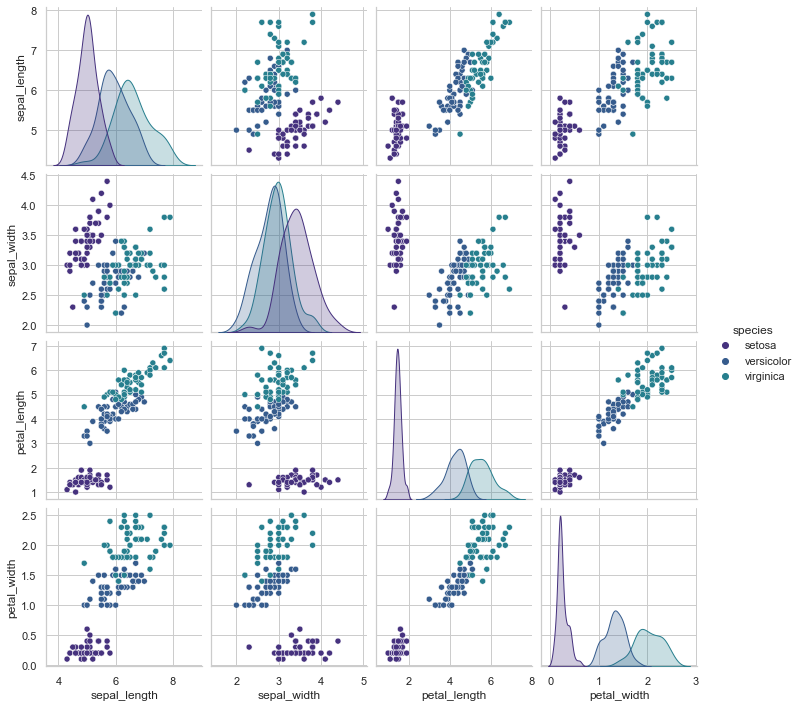

In [6]:
# small dataset with only a few features, suffices to make a pairplot
sns.pairplot(iris, hue = 'species')
plt.show()

It is clear that the 'setosa' species separates neatly from the other two, while there are a few noisy points between the 'versicolor' and 'virginica' species.

## Classification using SVM

In [7]:
# train-test splitting of data
from sklearn.model_selection import train_test_split

In [8]:
# choose appropriate columns of data to train the model
X = iris.drop('species', axis = 1)
y = iris['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 287)
# as splitting occurs randomly, use "random_state = 287" only to recreate my results exactly

In [10]:
# train the SVM classifier model
from sklearn.svm import SVC

In [11]:
# first fit to naive guesses on params of 'rbf' kernel
svmc = SVC(C = 0.1, gamma = 0.1, kernel = 'rbf')

In [12]:
svmc.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

In [13]:
# predictions
predictions = svmc.predict(X_test)

In [14]:
# evaluation using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 9  0  0]
 [ 0 15  1]
 [ 0  5 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.75      0.94      0.83        16
   virginica       0.94      0.75      0.83        20

    accuracy                           0.87        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.88      0.87      0.87        45



The 'rbf' (radial basis function) kernel of SVM classifier is very sensitive to the values of the parameters `C` and `gamma`. It is thus wise to employ a grid search routine to arrive at the values of these parameters that give best results. Following is a demonstration of grid search's implementation using `scikit-learn`.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# create a dictionary with keys as param_names and a list/array of its possible values as the corresponding values
param_grid = {'C': np.power(10.0, np.arange(-1, 3)), 'gamma': np.power(10.0, np.arange(-3, 1))}

In [18]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.429 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.381 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.381 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.381 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.381 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.429 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([  0.1,   1. ,  10. , 100. ]),
                         'gamma': array([0.001, 0.01 , 0.1  , 1.   ])},
             verbose=3)

In [20]:
# see best parameters
grid.best_params_

{'C': 1.0, 'gamma': 1.0}

In [21]:
# make predictions with best params
grid_predictions = grid.predict(X_test)

In [22]:
# check performance
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 9  0  0]
 [ 0 14  2]
 [ 0  2 18]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      0.88      0.88        16
   virginica       0.90      0.90      0.90        20

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



## Conclusion

The data on various species of the iris flower was fitted to the SVM Classifier model. The first run was using naive guesses on the values of model parameters, the model so trained could classify the 3 species with an F1-score of $87\%$. Then, a grid search routine was used to arrive at the value of these parameters that give best results; which boosted the F1-score to $91\%$.